In [132]:
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import IPython.display 
from io import BytesIO
from base64 import b64encode
from PIL import Image


In [117]:
infd = open('ve30.ld', 'rb')

bufsize = 1820 * 525 * 3
inbuf = infd.read(bufsize * 2)
data = np.fromstring(inbuf, 'uint16', bufsize)

print(data.shape)

(2866500,)


In [136]:
# Draws a uint16 image as a uint8, defaults to one frame
def drawdata(bm, x = 1820, y = 525):
#    bmf = np.float32(bm) / 65536.0
    if y is None:
        y = len(bm) // x
    
    bmf = np.uint8(bm[0:1820*y] / 256.0)
    print(bmf.shape)
    if x is not None:
        bms = (bmf.reshape(len(bmf)//1820, -1))
    else:
        bms = bmf
    
    print(bms.dtype, bms.shape, bms[:][0:y].shape)
    im = Image.fromarray(bms[0:y])
#    imshow(np.asarray(im))
    b = BytesIO()
    im.save(b, format='png')
    return IPython.display.Image(b.getvalue())
                         
#drawdata(data)                         

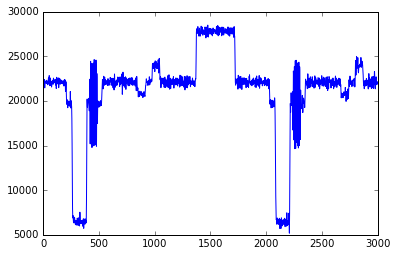

In [135]:
plt.plot(data[0:3000])